<h3> Desarrollo Experimental 2
<h3>Tarea 4
    
<h3> Fidel Alejandro Navarro Salazar

En este código se implementará una simulación de Monte Carlo para el cálculo de las propiedades estructurales y termodinámicas de sistemas con modelos de interacción de potencial continuo. Con unidades reducidas $\sigma - \beta$.

Para la simulación se consideró una fracción de volumen de $4.4*10^{-4}$

El potencial a utilizar será el Potencial DLVO (Yukawa)

$\beta u(r) = Ke^{-\kappa r}/r$

Donde $K=580$ y $\kappa = 0.149$



In [1]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image
import random as rd
#la función se encuentra en un documento por separado, 
#permite calcular la configuración inicial y la longitud de la caja
#la energía de la configuración inicial para 2D y 3D,
#y el calculo de las configuraciones en 2D y 3D
from config_T4 import caja, L_bi, sumup3d, movimiento3d, gdr, pote
#from numba import njit

In [2]:
#Establecemos los valores con los cuales trabajaremos

N = 500       #Número de partículas
n = 6*4.4e-4 / np.pi         #Densidad
dim = 3         #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep = 15000    #Número de configuraciones
#--------------------------------------------------------------------------------------------
seed = 652      #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)   #Le damos la semilla al generador de números aleatorios
nFrec = 100     #Frecuencia con la que se guardarán los datos
nener = 5000    #Iteración donde se alcanza el equilibrio termodinámico
iPrint = 1000   #Cada cuantos pasos escribira en pantalla los resultados
iRatio = 100    #Frecuencia de corección de paso
cc = 0.5        #Criterio de corrección
#--------------------------------------------------------------------------------------------
L = L_bi(n,N,dim)  #LLamamos a la función que nos calcularála longitud de la celda
rCut = L/2.        #Radio de corte
drMax = 0.1        #Longitud de paso
#--------------------------------------------------------------------------------------------
#Por medio de la función "caja" obtenemos las posiciones de la configuración inicial
v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
z = v[:,2].copy()
inicial = pd.DataFrame(v , columns={"x","y", "z"})   #dataFrame de los mismos
#Calculamos la energía de la configuración inicial
V= sumup3d(N,L,rCut, x, y, z)
Vlrc = 0. #No hay corrección de largo alcance (potencial de corto alcance)
Vi = V + Vlrc
print ("Energía de la configuración inicial",Vi)

#Seleccionamos una partícula trazadora
iTraza = int(rd.uniform(0,N))
if iTraza==N:
    iTraza = N-1
print ("La partícula trazadora es:", iTraza)

Energía de la configuración inicial 70779.34922256335
La partícula trazadora es: 71


In [3]:
xfin, yfin, zfin, xTraza, yTraza, zTraza, vTraza, Cx, Cy, Cz, ki2 = movimiento3d(x, y, z, N, nStep, L, rCut, drMax, iRatio, iPrint, cc, V, iTraza, Vi, nener)

0 0.0074 0.095 282.2767619634827 

1000 0.92796 0.154744989543857 235.71467552654974 

2000 0.88894 0.2520632819887201 235.18220942668145 

3000 0.82136 0.41058452563931336 235.11420175007768 

4000 0.7215 0.6687989276518426 235.02562864604724 

5000 0.56078 1.0894029796466018 235.10892362251118 

6000 0.4888 1.1891010821944572 235.0866634567366 

7000 0.48974 1.17431145191975 234.99757721054473 

8000 0.50056 1.2817800615563744 235.140157419624 

9000 0.50636 1.2658377220128547 235.07328484953106 

10000 0.5133 1.2500936678052856 234.9856867472652 

11000 0.51608 1.2345454327288585 235.14172727077613 

12000 0.51744 1.219190581252571 235.08411011659075 

13000 0.48238 1.2040267081377178 235.0322778969361 

14000 0.4834 1.1890514380611257 235.10473500999058 



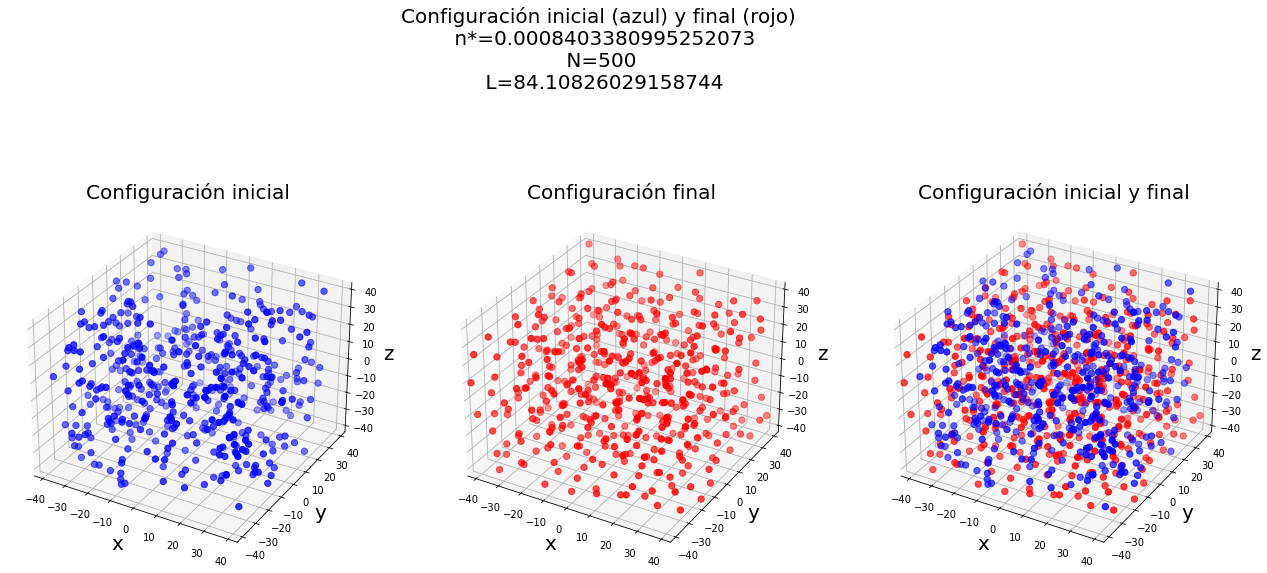

In [17]:
fig = plt.figure()
fig.set_size_inches(22,11)
fig.suptitle("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")

ax1.set_title("Configuración inicial", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2.,L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax2.set_title("Configuración final", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(-L/2.,L/2.)
ax2.set_ylim(-L/2.,L/2.)  
ax2.set_zlim(-L/2.,L/2.)

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")
ax3.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax3.set_title("Configuración inicial y final", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(-L/2.,L/2.)
ax3.set_ylim(-L/2.,L/2.)  
ax3.set_zlim(-L/2.,L/2.)

fig.savefig('configuraciones', dpi=fig.dpi, facecolor="white")

plt.show()

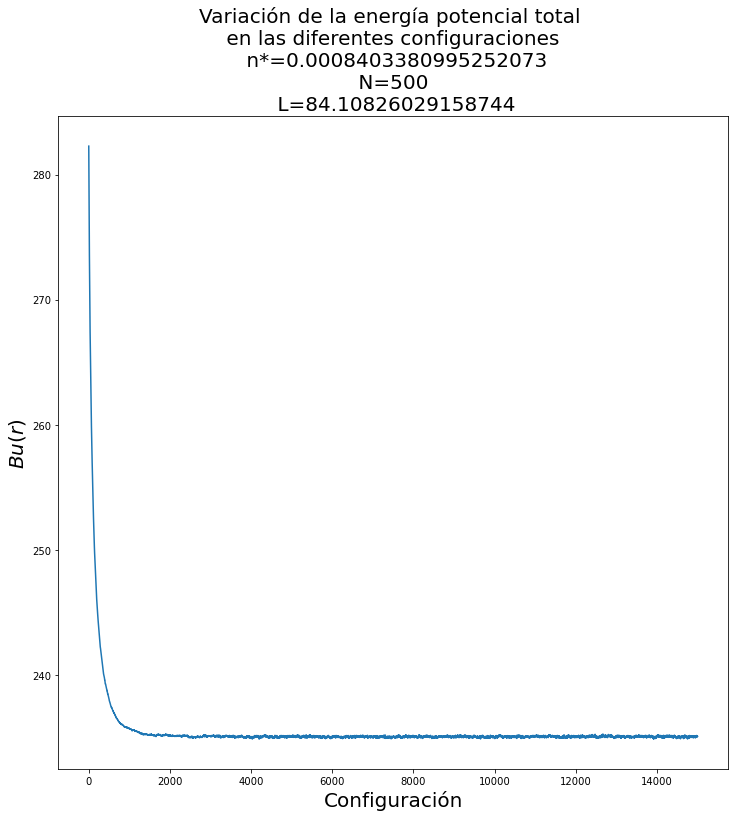

In [18]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(np.linspace(0,nStep,nStep), vTraza)
    
ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("$B u(r)$", size=20)
ax.set_xlabel("Configuración", size=20)
#ax.set_ylim(vTraza.min(), vTraza.max()) 
#ax.set_ylim(225,226)

fig.savefig('T4_Confi_Energia', dpi=fig.dpi, facecolor="white")

plt.show()

np.savetxt('vTraza.csv', vTraza, delimiter=',')

In [6]:
rt, gdr = gdr(Cx, Cy, Cz, rCut, L, nStep, n, N, ki2)

np.savetxt('rt.csv', rt, delimiter=',')
np.savetxt('gdr.csv', gdr, delimiter=',')

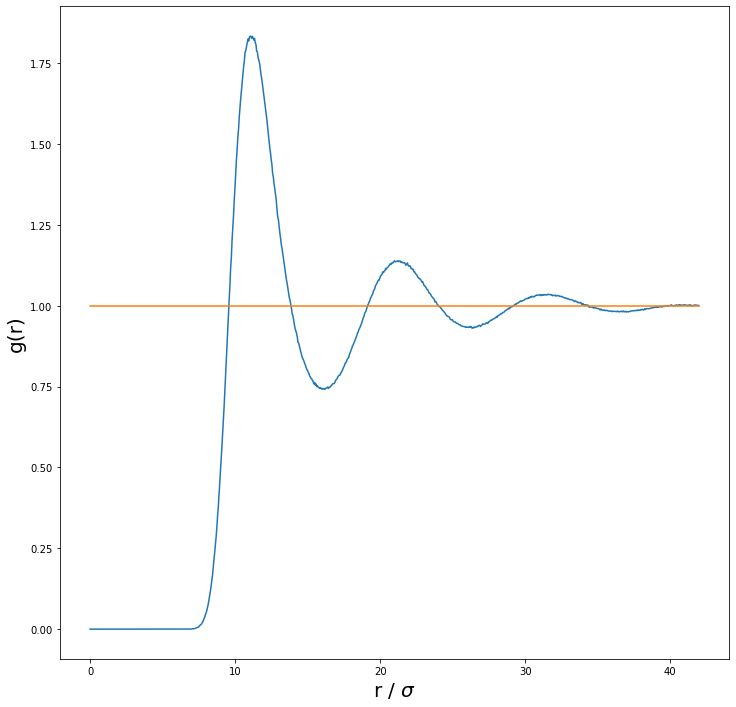

In [14]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot([rt.min(), rt.max()],[1,1])

ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(30, 40) 

fig.savefig('T4_GDR', dpi=fig.dpi, facecolor="white")

plt.show()

In [8]:
vTraza.mean()

235.55955480802507

In [9]:
#rt = np.nan_to_num(rt, nan=0.0)
#np.savetxt('rt.csv', rt, delimiter=',')
#np.savetxt('gdr.csv', gdr, delimiter=',')

In [10]:
pote(rt, gdr, n)

ICONTACTO =  840 , GDR DE CONTACTO =  1.0006172803260822
rho =  0.0008403380995252073 , Phs =  0.0026014245128991123


<h3>Bibliografía

https://www.researchgate.net/publication/10855997_Self-consistent_theory_of_collective_Brownian_dynamics_Theory_versus_simulation

Comparando los resultados de la función de la distribución radial con el potencial de Yukawa repulsivo de Gaylor et al. con $K=556$, $\kappa = 0.149$

In [11]:
df = pd.read_csv("digit.csv", header=None)

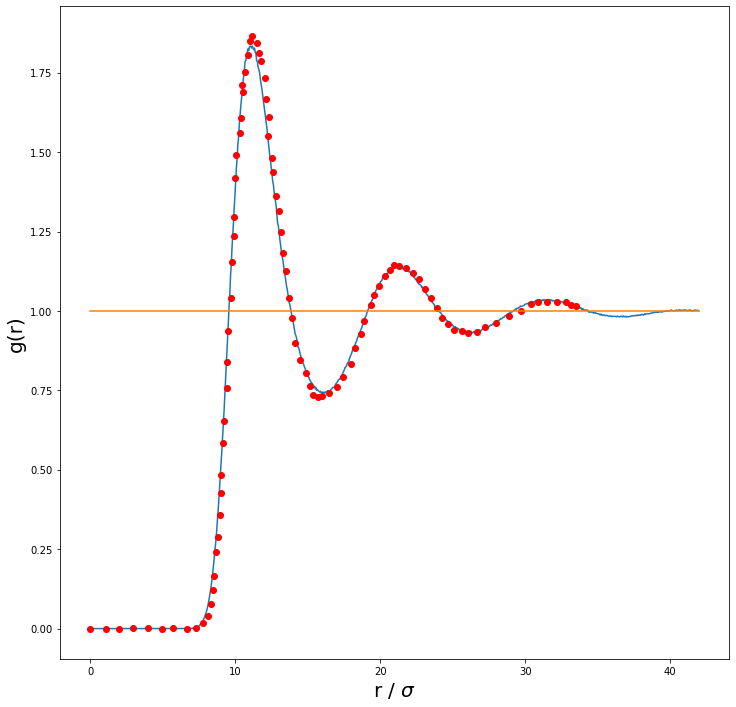

In [13]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot(df[0], df[1], "o",color = "red")

ax.plot([rt.min(), rt.max()],[1,1])

ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(6, 10) 

fig.savefig('T4_GDR_comparación', dpi=fig.dpi, facecolor="white")

plt.show()